In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [2]:
data = pd.read_csv('heart_disease.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.isnull().values.any()

False

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
count = pd.value_counts(data['target'])
count

1    165
0    138
Name: target, dtype: int64

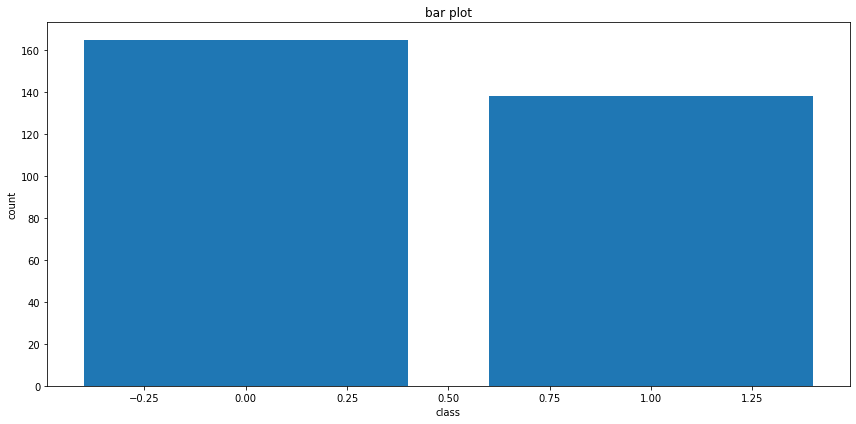

In [7]:
plt.figure(figsize=(12,6))
plt.bar(range(2), count)
plt.xlabel('class')
plt.ylabel('count')
plt.title('bar plot')
plt.tight_layout()
plt.show()

In [8]:
features = data.drop(['target'], axis='columns')
labels = data['target']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state = 4)

In [14]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
182,61,0,0,130,330,0,0,169,0,0.0,2,0,2
118,46,0,1,105,204,0,1,172,0,0.0,2,0,2
83,52,1,3,152,298,1,1,178,0,1.2,1,0,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
129,74,0,1,120,269,0,0,121,1,0.2,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2
87,46,1,1,101,197,1,1,156,0,0.0,2,0,3
197,67,1,0,125,254,1,1,163,0,0.2,1,2,3
174,60,1,0,130,206,0,0,132,1,2.4,1,2,3


In [15]:
y_train

182    0
118    1
83     1
106    1
129    1
      ..
58     1
87     1
197    0
174    0
122    1
Name: target, Length: 227, dtype: int64

In [25]:
clf = RandomForestClassifier(n_estimators = 40, criterion='gini')
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [26]:
preds = clf.predict(x_test)

In [27]:
print(accuracy_score(preds, y_test))

0.8421052631578947


In [28]:
preds

array([0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1], dtype=int64)

In [32]:
print(classification_report(preds, y_test))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81        31
           1       0.88      0.84      0.86        45

    accuracy                           0.84        76
   macro avg       0.84      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76



In [34]:
np.sum(preds[preds==0])

0

In [35]:
df = pd.DataFrame(preds, columns=['class'])
df

,class
0,0
1,0
2,1
3,1
4,0
...,...
71,1
72,1
73,0
74,1


In [36]:
count_new = pd.value_counts(df['class'])

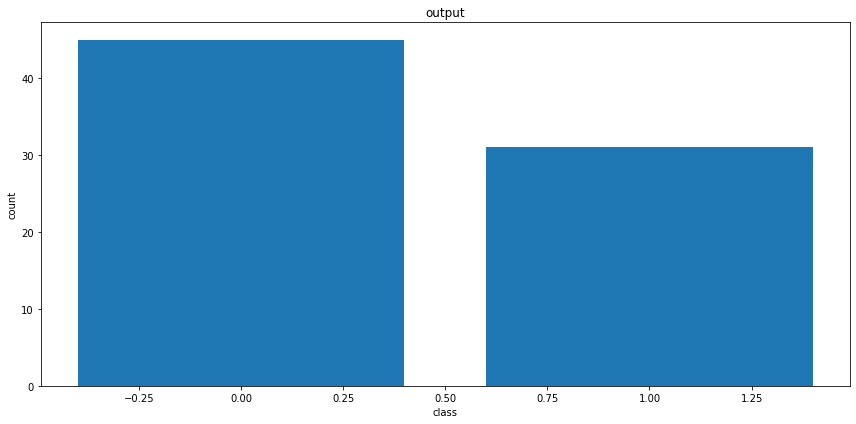

In [38]:
plt.figure(figsize=(12,6))
plt.bar(range(2),  count_new)
plt.xlabel('class')
plt.ylabel('count')
plt.title('output')
plt.tight_layout()
plt.show()

In [39]:
cm = confusion_matrix(preds, y_test)
cm

array([[26,  5],
       [ 7, 38]], dtype=int64)

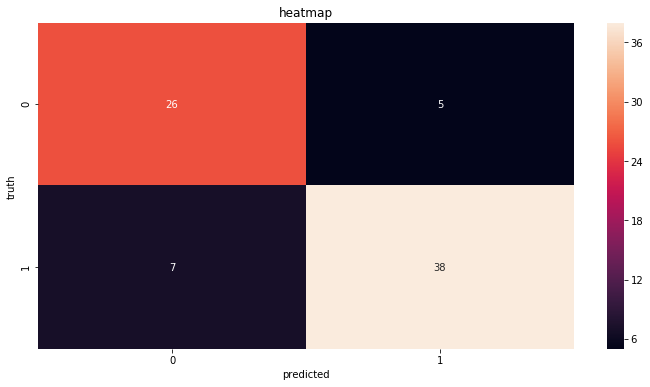

In [40]:
plt.figure(figsize=(12,6))
sns.heatmap(cm, annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')
plt.title('heatmap')
plt.show()

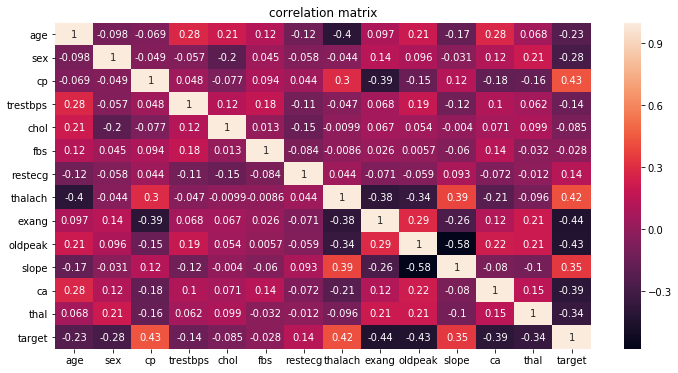

In [42]:
corrmat = data.corr()
top_index = corrmat.index
plt.figure(figsize=(12,6))
sns.heatmap(data[top_index].corr(), annot=True)
plt.title('correlation matrix')
plt.show()